In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


In [3]:
# 1. Load your dataset

data=pd.read_csv("CC GENERAL.csv")

## Suppression de la colonne 'CUST_ID'
data=data.drop("CUST_ID", axis=1)
data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [4]:
## Vérification des valeurs manquantes
data.isnull().sum()

##Pour chaque variable, on remplace les valeurs manquantes par la valeur mediane
for column in data.columns:
    data[column] = data[column].fillna(data[column].median())
    
data.isnull().sum()


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [5]:
## Normalisation des données
"""les données seront transformées de manière à ce que leur moyenne soit 0 et leur écart-type soit 1"""
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [8]:
## Réduction de la dimensionnalité avec PCA
"""Le PCA est une technique qui permet de réduire la dimensionnalité d’un ensemble de données en transformant les données originales en un nouvel ensemble de variables appelées composantes principales. 
Ces nouvelles composantes sont une combinaison linéaire des variables originales et sont choisies de manière à maximiser la variance. 
Dans ce cas, les données sont réduites à deux dimensions."""
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

In [10]:
# 2. Use hierarchical clustering to identify the inherent groupings within your data

from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='complete')

#Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric
clust_labels=model.fit_predict(pca_data)
agglomerative=pd.DataFrame(clust_labels)

agglomerative.describe()

,0
count,8950.000000
mean,0.988156
std,0.144456
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,4.000000


"\nplt.figure(figsize=(10, 6))\nplt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.5)\nplt.xlabel('Première composante principale')\nplt.ylabel('Deuxième composante principale')\nplt.title('Clustering avec K-means')\nplt.colorbar(label='Cluster')\nplt.show()\n"

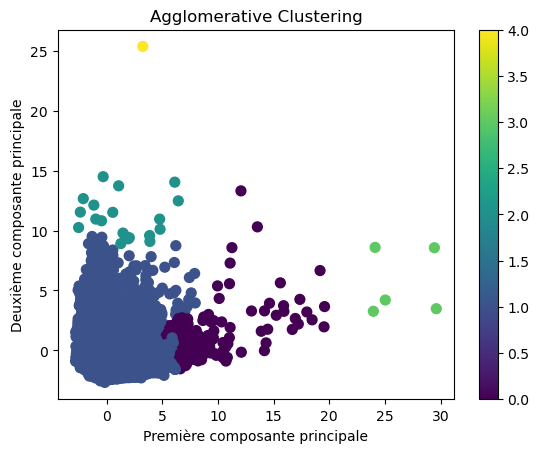

In [13]:
# 3. Plot the clusters

import matplotlib.pyplot as plt
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (pca_data[:, 0], pca_data[:, 1], c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel('Première composante principale')
ax.set_ylabel("Deuxième composante principale")
plt.colorbar(scatter)
 


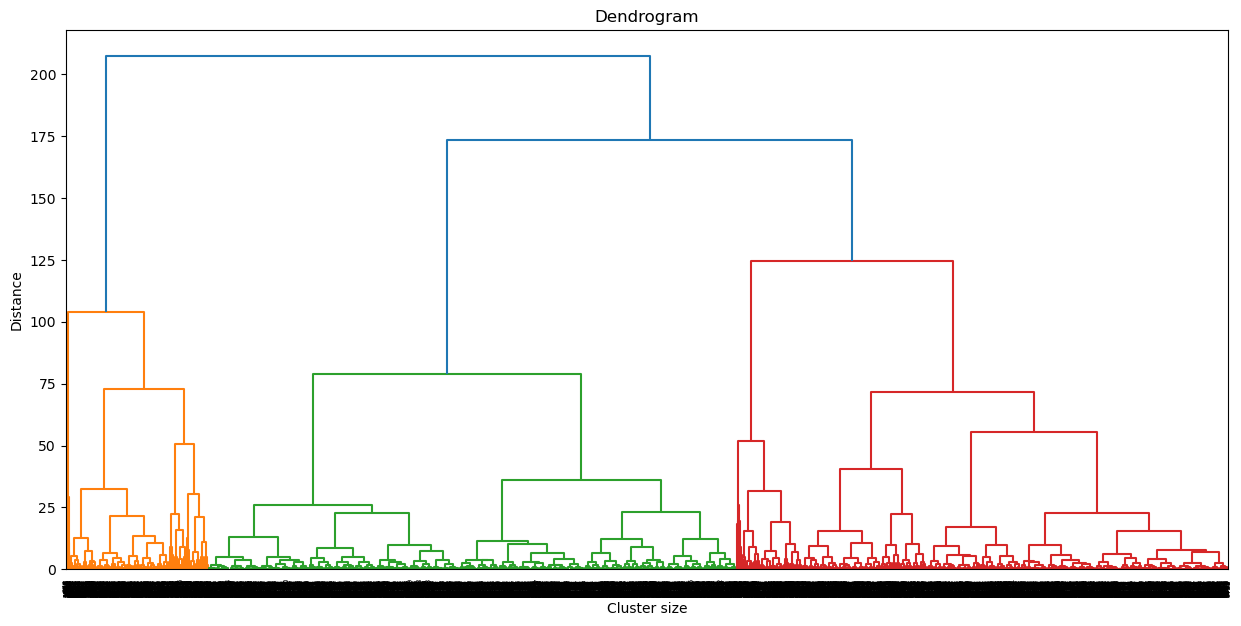

'import matplotlib.pyplot as plt\nimport scipy.cluster.hierarchy as shc\nplt.figure(figsize=(10,7))\nplt.title("Customer Dendrograms")\ndend=shc.dendrogram(shc.linkage(data, method="complete"))'

In [16]:
# 4. Plot the dendrogram
Z = linkage(pca_data, 'ward')
plt.figure(figsize=(15, 7))
dendrogram(Z, truncate_mode='level')
plt.title('Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


In [17]:
# Use K-means clustering
# 5. Try different K values and select the best one
Sum_of_squared_distances =[]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, n_init=10)
    km = km.fit(pca_data)
    Sum_of_squared_distances.append(km.inertia_)

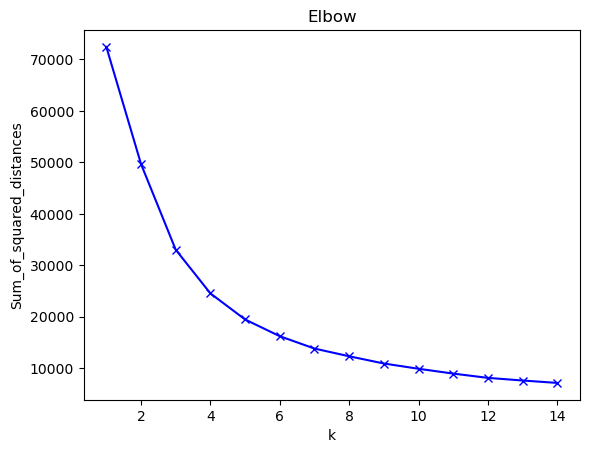

In [18]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow')
plt.show()

In [20]:
# The optimal number of clusters is 3
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(pca_data)


KMeans(n_clusters=3, n_init=10, random_state=0)

In [21]:
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,2
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


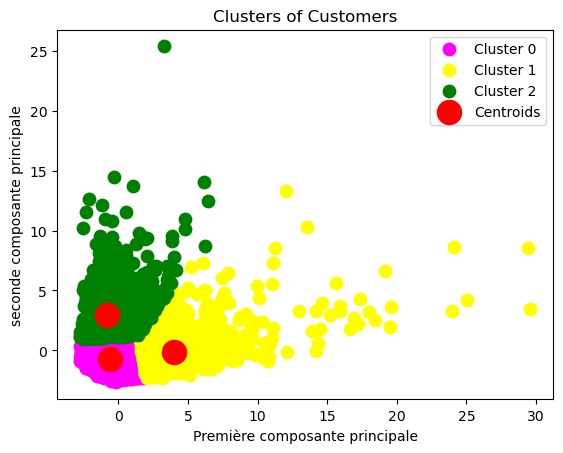

In [27]:
plt.scatter(pca_data[:,0][pred_y == 0], pca_data[:,1][pred_y == 0], s=80, c='magenta', label='Cluster 0')
plt.scatter(pca_data[:,0][pred_y == 1], pca_data[:,1][pred_y == 1], s=80, c='yellow', label='Cluster 1')
plt.scatter(pca_data[:,0][pred_y == 2], pca_data[:,1][pred_y == 2], s=80, c='green', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Première composante principale')
plt.ylabel('seconde composante principale')
plt.legend()
plt.show()
 

In [32]:
# 7. Compare the two results
from sklearn.metrics import silhouette_score

# Calcul du score de silhouette pour le clustering agglomératif
silhouette_avg_agg = silhouette_score(pca_data, clust_labels)
print("Le score moyen de silhouette pour le clustering agglomératif est :", silhouette_avg_agg)

# Calcul du score de silhouette pour K-means
silhouette_avg_kmeans = silhouette_score(pca_data, pred_y)
print("Le score moyen de silhouette pour K-means est :", silhouette_avg_kmeans)



Le score moyen de silhouette pour le clustering agglomératif est : 0.6662617829451987
Le score moyen de silhouette pour K-means est : 0.4520351374639176


In [ ]:
"""
le clustering agglomératif a mieux performé que le K-means.

Le score de silhouette pour le clustering agglomératif est de 0.666, ce qui est relativement proche de 1. 
Cela indique que les points de données dans chaque cluster sont proches les uns des autres et éloignés des points de données des autres clusters.

En revanche, le score de silhouette pour le K-means est de 0.452, ce qui est plus éloigné de 1. 
Cela pourrait indiquer que les points de données dans chaque cluster ne sont pas aussi proches les uns des autres qu’ils le sont dans le clustering agglomératif, ou qu’ils sont plus proches des points de données des autres clusters.

"""

In [31]:
# Bonus: Search for another validation metric
from sklearn.metrics import silhouette_score


range_n_clusters = list(range(2,15))
best_n_clusters = 0
best_silhouette_avg = -1

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(pca_data)

    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    print("Pour n_clusters =", n_clusters, "Le score moyen de silhouette est :", silhouette_avg)

    # Enregistrer le meilleur score de silhouette et le nombre de clusters correspondant
    if silhouette_avg > best_silhouette_avg:
        best_silhouette_avg = silhouette_avg
        best_n_clusters = n_clusters

print("Le meilleur score de silhouette est", best_silhouette_avg, "avec", best_n_clusters, "clusters.")



Pour n_clusters = 2 Le score moyen de silhouette est : 0.46144126148946335
Pour n_clusters = 3 Le score moyen de silhouette est : 0.45200596696144246
Pour n_clusters = 4 Le score moyen de silhouette est : 0.40735989273721146
Pour n_clusters = 5 Le score moyen de silhouette est : 0.4006607147494275
Pour n_clusters = 6 Le score moyen de silhouette est : 0.3828093838714902
Pour n_clusters = 7 Le score moyen de silhouette est : 0.3821373663574911
Pour n_clusters = 8 Le score moyen de silhouette est : 0.39340882790646164
Pour n_clusters = 9 Le score moyen de silhouette est : 0.3706016734388624
Pour n_clusters = 10 Le score moyen de silhouette est : 0.3642009856605931
Pour n_clusters = 11 Le score moyen de silhouette est : 0.3748351515637981
Pour n_clusters = 12 Le score moyen de silhouette est : 0.3688066093496584
Pour n_clusters = 13 Le score moyen de silhouette est : 0.36946575703596124
Pour n_clusters = 14 Le score moyen de silhouette est : 0.3372528968873808
Le meilleur score de silhoue